In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 0.00001]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

In [3]:
check_parameters(agents, M, E, I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.03 		 0.38 |
| 1000 		 0.08 		 0.0 |
| 1000 		 0.01 		 0.12 |
| 1000 		 0.16 		 0.29 |
| 1000 		 0.11 		 0.35 |
| 1000 		 0.11 		 0.22 |
| 1000 		 0.35 		 0.16 |
| 1000 		 0.41 		 0.34 |
| 1000 		 0.17 		 0.15 |
| 1000 		 0.02 		 0.09 |
| 1000 		 0.52 		 0.23 |
| 1000 		 0.29 		 0.18 |
| 1000 		 0.12 		 0.06 |
| 1000 		 0.24 		 0.33 |
| 1000 		 0.01 		 0.17 |
| 1000 		 0.08 		 0.09 |
| 1000 		 0.05 		 0.25 |
| 1000 		 0.14 		 0.32 |
| 1000 		 0.28 		 0.2 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.14
The s.d. of I is: 0.14
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.21
The mean of I is: 0.2
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 1e-05, 0.2, 0.2
condition mean M satisfied
condi

(array([17., 22., 15., 15., 11., 12.,  3.,  3.,  1.,  1.]),
 array([0.   , 0.067, 0.134, 0.201, 0.268, 0.335, 0.402, 0.469, 0.536,
        0.603, 0.67 ]),
 <a list of 10 Patch objects>)

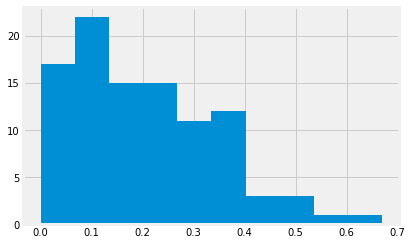

In [4]:
plt.hist([agent.i for agent in agents])

(array([15., 19., 15., 12., 19.,  9.,  3.,  1.,  4.,  3.]),
 array([0.   , 0.059, 0.118, 0.177, 0.236, 0.295, 0.354, 0.413, 0.472,
        0.531, 0.59 ]),
 <a list of 10 Patch objects>)

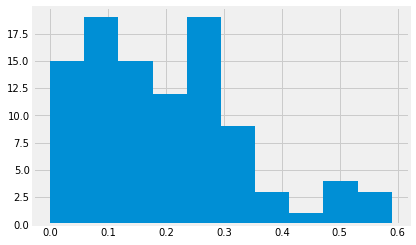

In [5]:
plt.hist([agent.e for agent in agents])

In [6]:
tournament_seed512_mm1000_me01_mi01_sdm0_sde02_sdi02 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 150 minutes.


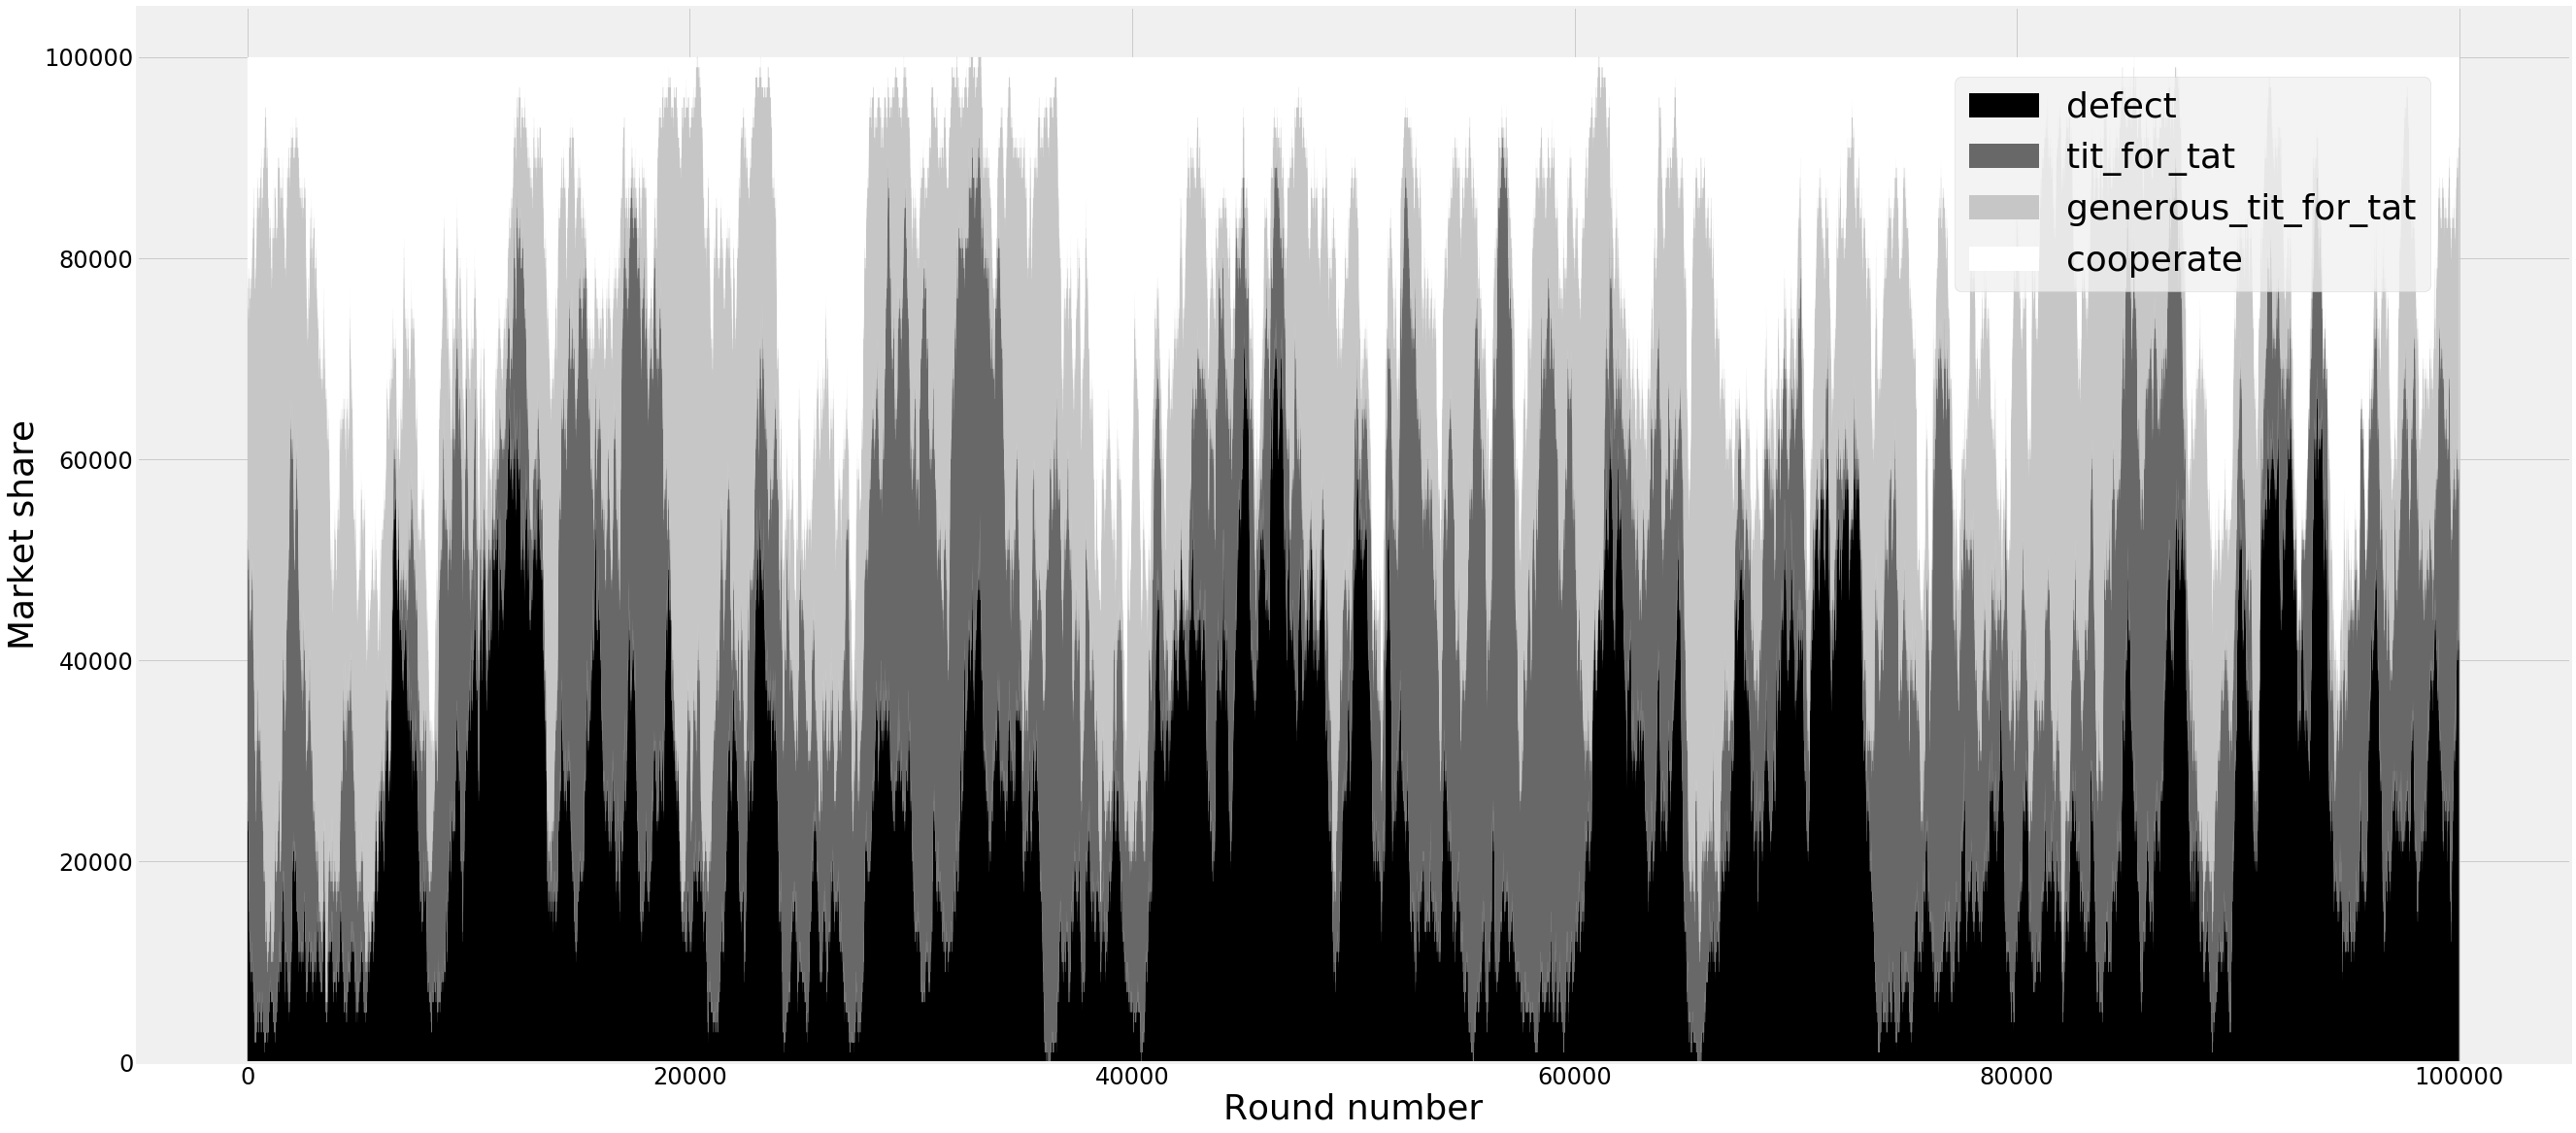

In [7]:
draw_stack(tournament_seed512_mm1000_me01_mi01_sdm0_sde02_sdi02)

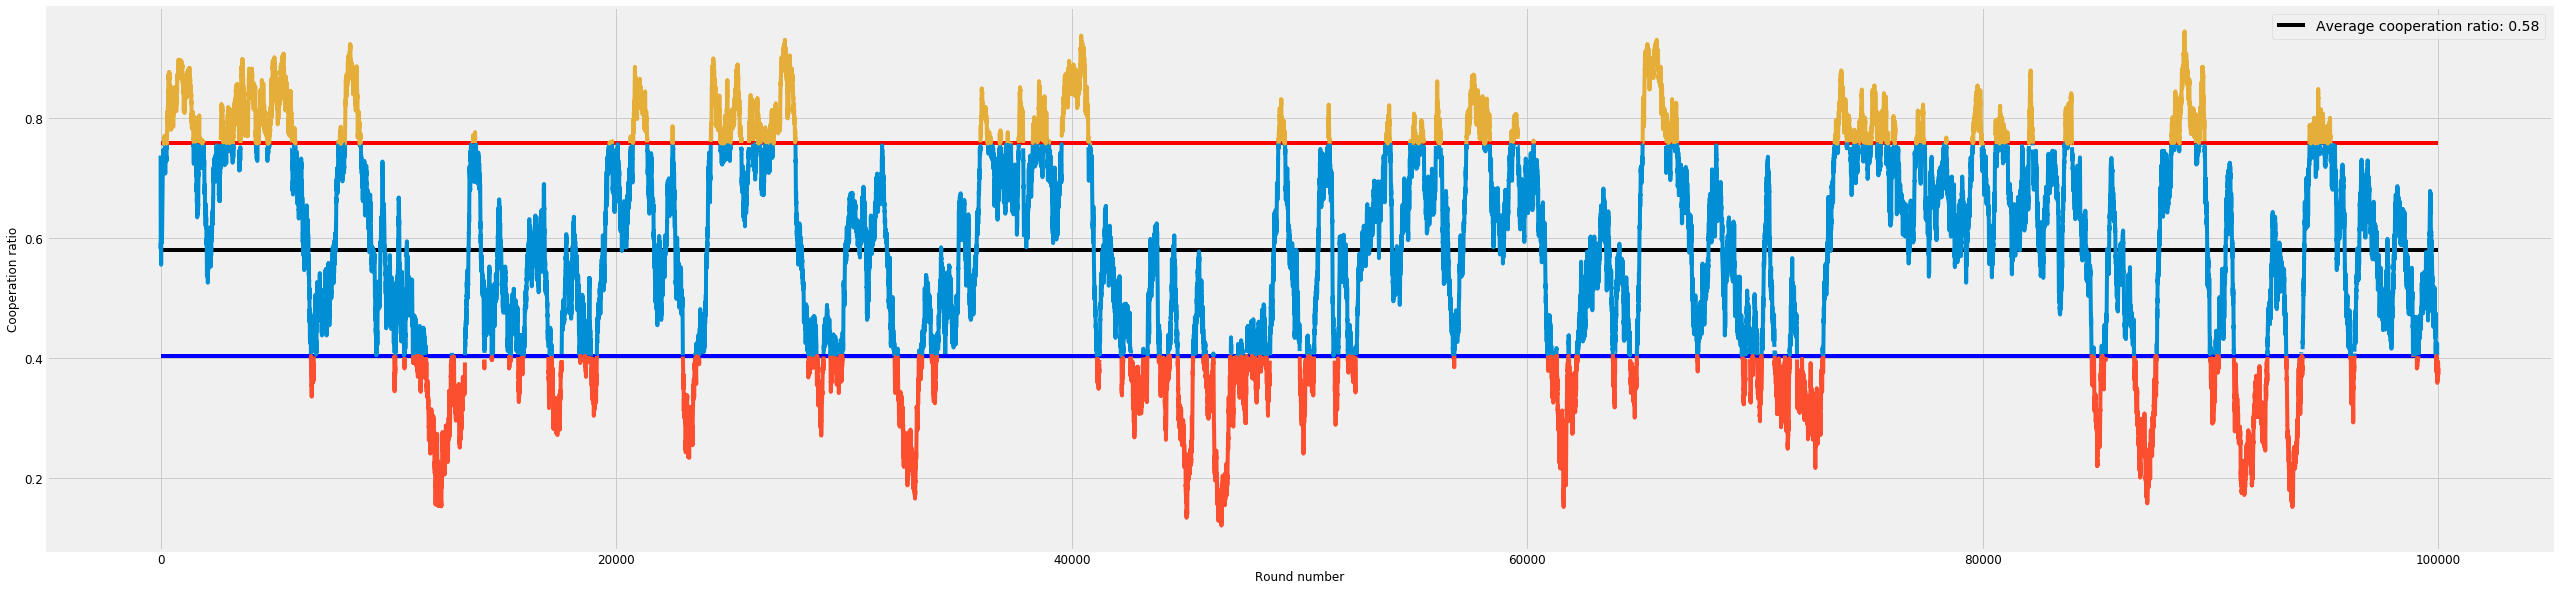

In [8]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed512_mm1000_me01_mi01_sdm0_sde02_sdi02, constant = 1)

In [9]:
outliers = count_outliers(tournament_seed512_mm1000_me01_mi01_sdm0_sde02_sdi02, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed512_mm1000_me01_mi01_sdm0_sde02_sdi02_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5     705
1    0.6     752
2    0.7     733
3    0.8     701
4    0.9     687
5    1.0     682
6    1.1     660
7    1.2     664
8    1.3     493
9    1.4     408
10   1.5     391
11   1.6     281
12   1.7     248
13   1.8     157
14   1.9     115
15   2.0      65
16   2.1      63
17   2.2      66
18   2.3      34
19   2.4      11
20   2.5      13
21   2.6       0
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


In [10]:
save_cooperate_csv(tournament_seed512_mm1000_me01_mi01_sdm0_sde02_sdi02, type_of_tournament= "seed256_mm1000_me01_mi01_sdm0_sde02_sdi02", seed = str(seed))